# Introduction

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs.

# Load Libraries & Data

In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import & Show Data
data = pd.read_csv('indian_liver_patient.csv', encoding= 'unicode_escape')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

In [3]:
# Checking Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Based on the result above show that the data have 583 row with 10 column. 
All columns except 'Albumin_and_Globulin_Ratio' has missing values.

# Missing Value Check & Handling

In [4]:
# Number of Missing Values per Column
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Based on the result above show that column 'Albumin_and_Globulin_Ratio' have 4 missing values.

In [5]:
# Drop Missing Values
data = data.dropna()

In [6]:
# Check Missing Values
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

There's no missing value again:)

# Duplicate Data Check & Handling

In [7]:
# Number of Duplicated Data
data.duplicated().sum()

13

Based on the result above show that there's 13 duplicated data.

In [9]:
# Sample Duplicated Rows
data[data.duplicated(keep=False)].sort_values('Age').head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
137,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.8,1
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.8,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.9,1
142,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.9,1
174,31,Male,0.6,0.1,175,48,34,6.0,3.7,1.6,1


In [10]:
# Drop Duplicated Rows
data = data.drop_duplicates()

In [11]:
# Check Duplicated Rows
data.duplicated().sum()


0

There's no duplicated data again:)

# Statistical Summaries of Column

In [13]:
# Grouping Columns by Data Category
categoricals = ['Gender']
numericals = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Dataset' ]

In [14]:
# Numerical Statistical Summary
data[numericals].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Result : 

1. 'Dataset' column is a boolean/binary column with values 1 and 2.
    
    

In [15]:
# Describe Method on Categorical Data
data[categoricals].describe()

,Gender
count,566
unique,2
top,Male
freq,428


# Univariate Analysis

Univariate analysis is an analysis used on one variable in purpose to know and identifying the characteristics of that variable.

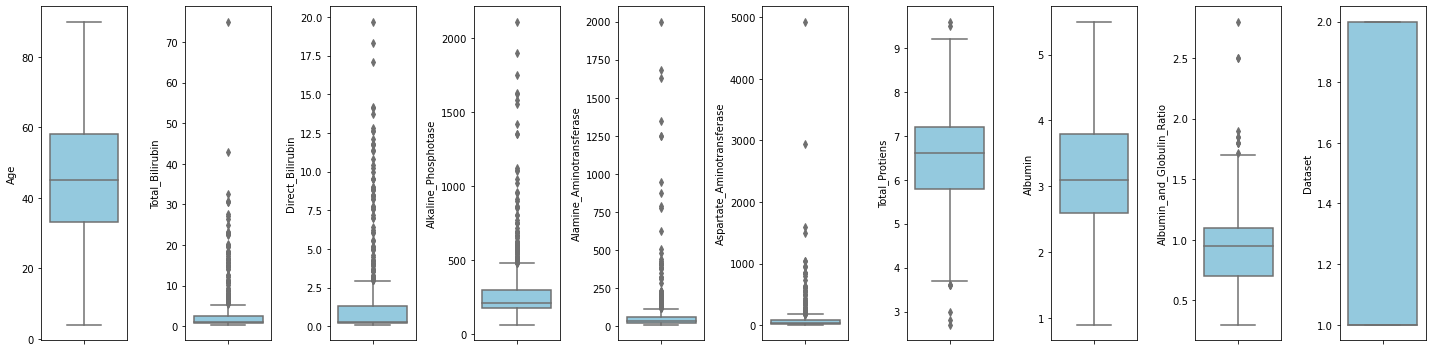

In [29]:
# Boxplot to Detect Outliers
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

Result : 

'Total_Bilirubin' , 'Direct_Bilirubin' , 'Alkaline_Phosphotase' , 'Alamine_Aminotransferase' , 'Aspartate_Aminotransferase' , 'Total_Protiens' , 'Albumin_and_Globulin_Ratio' are have outliers.

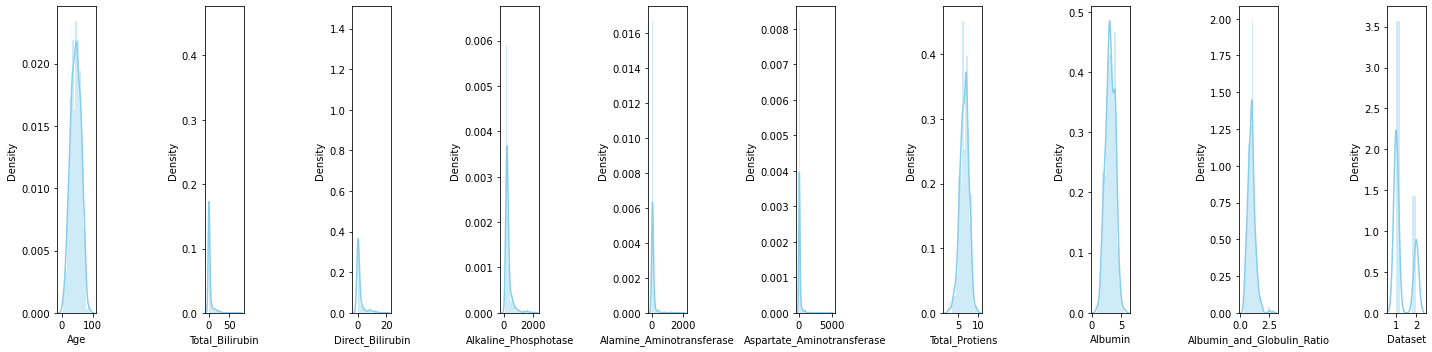

In [24]:
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()


Result : 

1. 'Dataset' column is a binary column.

2. 'Age', 'Total_Protiens' , 'Albumin' , 'Albumin_and_Globulin_Ratio' column are symmetrical distribution.

3. 'Total_Bilirubin' , 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase' , 'Asparte_Aminotransferase' column are negatively skewed.

# Bivariate Analysis

Bivariate analysis is used to analyze 2 variables and find a relation. Bivariate analysis is also one way to use correlation coefficients in order to find out whether two variables have a relationship or not.

<AxesSubplot:xlabel='Gender', ylabel='count'>

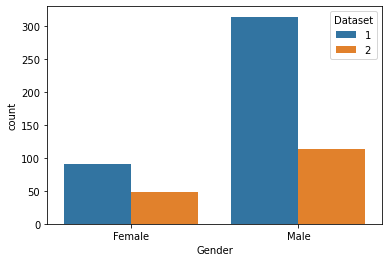

In [19]:
# Age vs Dataset 
sns.countplot(data=data,x='Gender', hue='Dataset')

Result : 

Based on plot result above showed that, in between female and male there is difference probability in infected liver disease. The plot showed that 'Male' have a high probability in infected liver disease rather than 'Female'.

<AxesSubplot:>

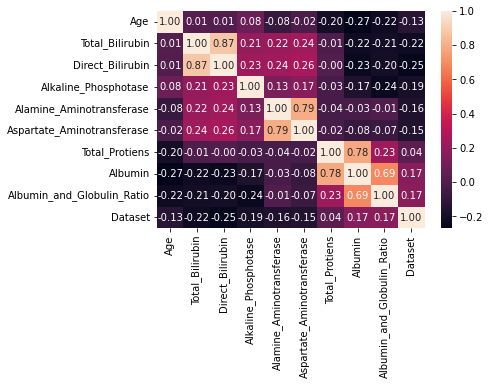

In [20]:
# Correlation Using Heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Result : There is high correlation between Direct_Bilirubin & Total_Bilirubin, Alamine_Aminotransferase & Asparte_Aminotransferase, Total Protiens & Albumin.

# Conclusion

1. Most of the columns have negatively skewed, except for 'Age', 'Total_Protiens' , 'Albumin' , 'Albumin_and_Globulin_Ratio' .

2. There are an outlier in 'Total_Bilirubin' , 'Direct_Bilirubin' , 'Alkaline_Phosphotase' , 'Alamine_Aminotransferase' , 'Aspartate_Aminotransferase' , 'Total_Protiens' , 'Albumin_and_Globulin_Ratio' column.

3. From barcharts of categorical column vs dataset, I found that male have high probability to infected rather than female. 

4. From correlation heatmap, there are highly correlated between Direct_Bilirubin & Total_Bilirubin, Alamine_Aminotransferase & Asparte_Aminotransferase, Total Protiens & Albumin.